<a href="https://colab.research.google.com/github/GoldKodo/Data/blob/main/10%EC%A3%BC%EC%B0%A8_API%EC%9D%B4%EC%9A%A9(%EB%B0%95%EC%8A%A4%EC%98%A4%ED%94%BC%EC%8A%A4%EA%B4%80%EA%B0%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q 맷플립 한글 코드 삽입하기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,999 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

API 연결하기

In [2]:
import requests  # import requests 는 가끔 쓰니까 굳이 요약어를 쓰지 않고 임포트만 진행

본인 API 발급 받기

In [3]:
apikey = '8703a8e0f33067b5f25c755cadc6f22d'    #본인 API 코드
tdt = '20230101'
url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json'

pram = {'key':apikey, 'targetDt':tdt}  #한번더 적기 {'key':apikey, 'tarkgetDt' : tdt}

resp = requests.get(url, params=pram)  #한번더 적기 requests.get(url,paramas = pram)
resp

<Response [200]>

In [4]:
data = resp.json()       #한번더 적기 data = resp.json()
print(data)

{'boxOfficeResult': {'boxofficeType': '일별 박스오피스', 'showRange': '20230101~20230101', 'dailyBoxOfficeList': [{'rnum': '1', 'rank': '1', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20225061', 'movieNm': '아바타: 물의 길', 'openDt': '2022-12-14', 'salesAmt': '5546745851', 'salesShare': '63.2', 'salesInten': '-1027346873', 'salesChange': '-15.6', 'salesAcc': '95843585053', 'audiCnt': '429533', 'audiInten': '-85748', 'audiChange': '-16.6', 'audiAcc': '7742682', 'scrnCnt': '2047', 'showCnt': '7148'}, {'rnum': '2', 'rank': '2', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20196478', 'movieNm': '영웅', 'openDt': '2022-12-21', 'salesAmt': '1908571119', 'salesShare': '21.7', 'salesInten': '-173788777', 'salesChange': '-8.3', 'salesAcc': '16442796442', 'audiCnt': '185254', 'audiInten': '-20082', 'audiChange': '-9.8', 'audiAcc': '1672933', 'scrnCnt': '1099', 'showCnt': '3563'}, {'rnum': '3', 'rank': '3', 'rankInten': '1', 'rankOldAndNew': 'OLD', 'movieCd': '20228313', 'movieNm': '오늘 밤, 세

In [6]:
data['boxOfficeResult']['dailyBoxOfficeList'][1]

{'rnum': '2',
 'rank': '2',
 'rankInten': '0',
 'rankOldAndNew': 'OLD',
 'movieCd': '20196478',
 'movieNm': '영웅',
 'openDt': '2022-12-21',
 'salesAmt': '1908571119',
 'salesShare': '21.7',
 'salesInten': '-173788777',
 'salesChange': '-8.3',
 'salesAcc': '16442796442',
 'audiCnt': '185254',
 'audiInten': '-20082',
 'audiChange': '-9.8',
 'audiAcc': '1672933',
 'scrnCnt': '1099',
 'showCnt': '3563'}

JSON 분석하기

 Q showRange 8자리만 가져오기

In [10]:
import pandas as pd
df = pd.DataFrame(data['boxOfficeResult']['dailyBoxOfficeList'])
df = df[['openDt', 'rank','movieNm', 'salesAmt','salesAcc', 'audiCnt', 'audiAcc']]
df['showRange'] = data['boxOfficeResult']['showRange']
df['showRange'] = df['showRange'].str[:8] #showRange 8자리만 가져오기
df.head(2)

,openDt,rank,movieNm,salesAmt,salesAcc,audiCnt,audiAcc,showRange
0,2022-12-14,1,아바타: 물의 길,5546745851,95843585053,429533,7742682,20230101
1,2022-12-21,2,영웅,1908571119,16442796442,185254,1672933,20230101


In [11]:
df.columns = ['개봉일','순위','영화명','매출액','누적매출액', '관객수','누적관객수','조회일']  #컬럼명 변경
df.info() # 보면 전부 object(문자열)로 되어있음. 이러면 그래프를 그릴 수가 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   개봉일     10 non-null     object
 1   순위      10 non-null     object
 2   영화명     10 non-null     object
 3   매출액     10 non-null     object
 4   누적매출액   10 non-null     object
 5   관객수     10 non-null     object
 6   누적관객수   10 non-null     object
 7   조회일     10 non-null     object
dtypes: object(8)
memory usage: 768.0+ bytes


Q 매출액, 누적매출액, 관객수, 누적관객수 정수로 바꾸기
Q 개봉일, 조회일, 날짜 타입으로 바꾸기.

In [12]:
df = df.astype({'매출액':'int', '누적매출액':'int', '관객수':'int', '누적관객수':'int'})
#만약 데이터에 ,(콤마) 가 있으면 그래프가 안그려짐. 그럴 땐 replace 명령어 사용

df['개봉일'] = pd.to_datetime(df['개봉일'])
df['조회일'] = pd.to_datetime(df['조회일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   개봉일     10 non-null     datetime64[ns]
 1   순위      10 non-null     object        
 2   영화명     10 non-null     object        
 3   매출액     10 non-null     int64         
 4   누적매출액   10 non-null     int64         
 5   관객수     10 non-null     int64         
 6   누적관객수   10 non-null     int64         
 7   조회일     10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 768.0+ bytes


In [13]:
#df['요일'] = df['조회일'].dt.day_name()  : 영어에서 변환할 때는 저거 한방이면 자동으로 됨.
df['요일'] = df['조회일'].dt.weekday.map({0:'월', 1:'화', 2:'수',
                                     3:'목',4:'금',5:'토',6:'일'})
df.head(2)

,개봉일,순위,영화명,매출액,누적매출액,관객수,누적관객수,조회일,요일
0,2022-12-14,1,아바타: 물의 길,5546745851,95843585053,429533,7742682,2023-01-01,일
1,2022-12-21,2,영웅,1908571119,16442796442,185254,1672933,2023-01-01,일


apikey, tdt, url 를 매개변수로 박스오피스 데이터프레임을 반환하는 사용자함수 get_boxoffice를 생성하자


-api, tdt를 이용해 url에 접근하기

-json 데이터 받아오기

-데이터 프레임 변경

-필드명 변경

-타입변경



In [14]:
def get_boxoffice(apikey, url, tdt):
  pram = {'key':apikey, 'targetDt':tdt}
  resp = requests.get(url, params=pram)
  data = resp.json()
  df = pd.DataFrame(data['boxOfficeResult']['dailyBoxOfficeList'])
  df = df[['openDt', 'rank','movieNm', 'salesAmt','salesAcc', 'audiCnt', 'audiAcc']]
  df['showRange'] = data['boxOfficeResult']['showRange']
  df['showRange'] = df['showRange'].str[:8]
  df.columns = ['개봉일','순위','영화명','매출액','누적매출액', '관객수','누적관객수','조회일']
  df = df.astype({'매출액':'int', '누적매출액':'int', '관객수':'int', '누적관객수':'int'})
  df['개봉일'] = pd.to_datetime(df['개봉일'])
  df['조회일'] = pd.to_datetime(df['조회일'])
  df['요일'] = df['조회일'].dt.weekday.map({0:'월', 1:'화', 2:'수',3:'목',4:'금',5:'토',6:'일'})
  return df

위 함수를 get_boxoffice 호출해 보자

In [16]:
df = get_boxoffice(apikey, url, '20240102')
df.head(2)

,개봉일,순위,영화명,매출액,누적매출액,관객수,누적관객수,조회일,요일
0,2023-12-20,1,노량: 죽음의 바다,657033879,37583151984,70990,3799840,2024-01-02,화
1,2023-11-22,2,서울의 봄,645476622,118662397169,67766,12184967,2024-01-02,화


20230101 ~ 20230115 의 데이터를 조회하자.

In [17]:
df =pd.DataFrame() # 빈 데이터프레임 생성 후 y에 20230101~20230116을 넣음.
for y in range(20230101, 20230116):
  df = pd.concat([df,get_boxoffice(apikey, url, str(y))])

df.head(20)

,개봉일,순위,영화명,매출액,누적매출액,관객수,누적관객수,조회일,요일
0,2022-12-14,1,아바타: 물의 길,5546745851,95843585053,429533,7742682,2023-01-01,일
1,2022-12-21,2,영웅,1908571119,16442796442,185254,1672933,2023-01-01,일
2,2022-11-30,3,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",318755877,7068912679,29733,692130,2023-01-01,일
3,2022-12-28,4,젠틀맨,276398168,1697482823,26293,178851,2023-01-01,일
4,2022-11-23,5,올빼미,241944506,32011012056,23419,3246186,2023-01-01,일
5,2022-12-14,6,신비아파트 극장판 차원도깨비와 7개의 세계,162441529,3579760605,17049,373832,2023-01-01,일
6,2023-01-04,7,스위치,91335982,311924866,8732,31880,2023-01-01,일
7,2022-12-22,8,눈의 여왕5: 스노우 프린세스와 미러랜드의 비밀,65057205,1158912824,6787,124810,2023-01-01,일
8,2022-12-28,9,몬스터 신부: 101번째 프로포즈,45186900,235671900,4614,25652,2023-01-01,일
9,2022-12-01,10,극장판 뽀로로와 친구들: 바이러스를 없애줘!,36730900,1777163300,3869,197213,2023-01-01,일


In [ ]:
df.reset_index(drop=True, inplace=True) # 인덱스 번호 초기화 후 다시 줄세우기
df.head(20)

,개봉일,순위,영화명,매출액,누적매출액,관객수,누적관객수,조회일,요일
0,2022-12-14,1,아바타: 물의 길,5546745851,95843585053,429533,7742682,2023-01-01,일
1,2022-12-21,2,영웅,1908571119,16442796442,185254,1672933,2023-01-01,일
2,2022-11-30,3,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",318755877,7068912679,29733,692130,2023-01-01,일
3,2022-12-28,4,젠틀맨,276398168,1697482823,26293,178851,2023-01-01,일
4,2022-11-23,5,올빼미,241944506,32011012056,23419,3246186,2023-01-01,일
5,2022-12-14,6,신비아파트 극장판 차원도깨비와 7개의 세계,162441529,3579760605,17049,373832,2023-01-01,일
6,2023-01-04,7,스위치,91335982,311924866,8732,31880,2023-01-01,일
7,2022-12-22,8,눈의 여왕5: 스노우 프린세스와 미러랜드의 비밀,65057205,1158912824,6787,124810,2023-01-01,일
8,2022-12-28,9,몬스터 신부: 101번째 프로포즈,45186900,235671900,4614,25652,2023-01-01,일
9,2022-12-01,10,극장판 뽀로로와 친구들: 바이러스를 없애줘!,36730900,1777163300,3869,197213,2023-01-01,일


Q 관객수 내림차순으로 상위 10개 보기 (sort_values)

In [18]:
df.sort_values('관객수', ascending=False).head(10)

,개봉일,순위,영화명,매출액,누적매출액,관객수,누적관객수,조회일,요일
0,2022-12-14,1,아바타: 물의 길,5546745851,95843585053,429533,7742682,2023-01-01,일
0,2022-12-14,1,아바타: 물의 길,3408251318,106665472827,251726,8554074,2023-01-07,토
0,2022-12-14,1,아바타: 물의 길,2970060027,109635532854,222534,8776608,2023-01-08,일
1,2022-12-21,2,영웅,1908571119,16442796442,185254,1672933,2023-01-01,일
0,2022-12-14,1,아바타: 물의 길,2343725725,116360663283,169086,9265649,2023-01-14,토
1,2023-01-04,2,더 퍼스트 슬램덩크,1608265970,8339245708,153322,806698,2023-01-14,토
0,2022-12-14,1,아바타: 물의 길,2040883707,118401546990,148709,9414358,2023-01-15,일
0,2022-12-14,1,아바타: 물의 길,1869536653,97713121706,145308,7887990,2023-01-02,월
1,2022-12-21,2,영웅,1365196965,20585860790,133408,2097702,2023-01-07,토
2,2023-01-04,3,더 퍼스트 슬램덩크,1370307256,3095077013,129238,299514,2023-01-07,토


요일별 관객수 보기

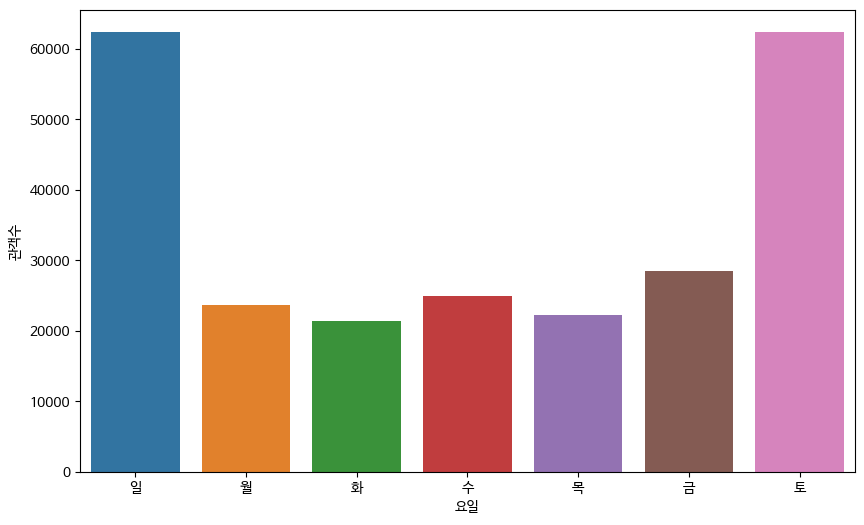

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rc("font",family="NanumBarunGothic")
sns.barplot(x='요일', y='관객수',hue = '요일', data=df,errorbar = None) #hue = '요일'을 하면 요일 별 색깔이 다르게 나오고, errorbar 혹은 ci = None 하면 선이 없어지고 막대만 남음.
plt.show()

영화별 관객수 보기

In [34]:
df['영화명'].unique()

array(['아바타: 물의 길', '영웅', '오늘 밤, 세계에서 이 사랑이 사라진다 해도', '젠틀맨', '올빼미',
       '신비아파트 극장판 차원도깨비와 7개의 세계', '스위치', '눈의 여왕5: 스노우 프린세스와 미러랜드의 비밀',
       '몬스터 신부: 101번째 프로포즈', '극장판 뽀로로와 친구들: 바이러스를 없애줘!',
       '장화신은 고양이: 끝내주는 모험', '더 퍼스트 슬램덩크', '3000년의 기다림', '유령', '프린스 챠밍',
       '시간을 꿈꾸는 소녀', '교섭', '문맨'], dtype=object)

<ipython-input-32-5ce745d0d2f6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='영화명', y='관객수', data = df, ci = None, hue = '영화명')


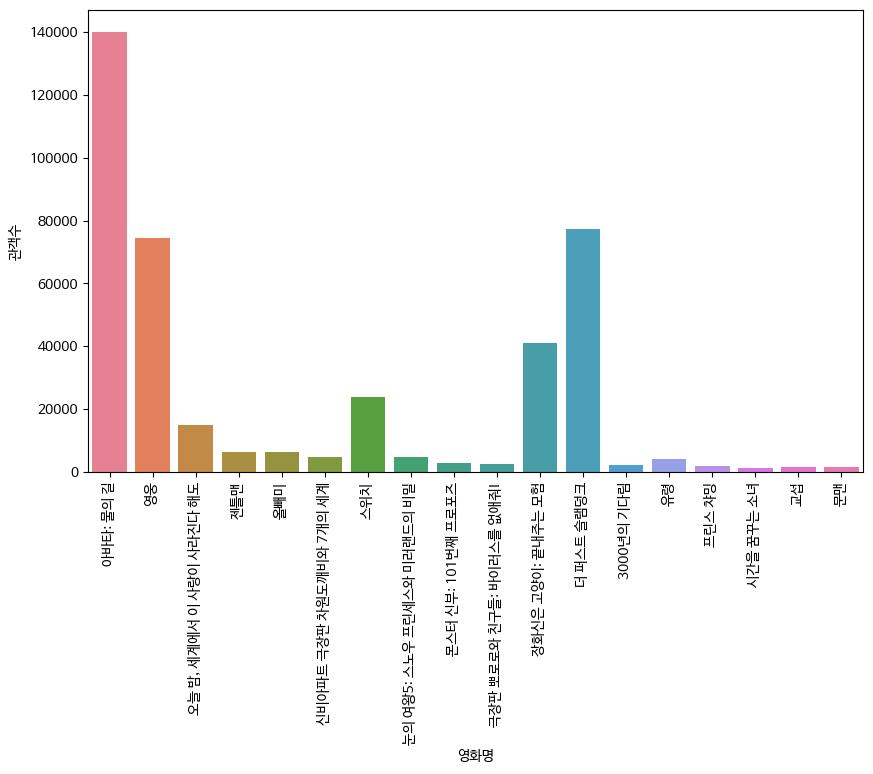

In [32]:
plt.figure(figsize=(10,6))
plt.rc("font",family="NanumBarunGothic")
sns.barplot(x='영화명', y='관객수', data = df, ci = None, hue = '영화명')
plt.xticks(rotation=90)
plt.show()

영화별 매출액 보기

<ipython-input-39-081b1c1a1b24>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y= '영화명', x= '매출액', data = df, hue = '영화명', ci = None)


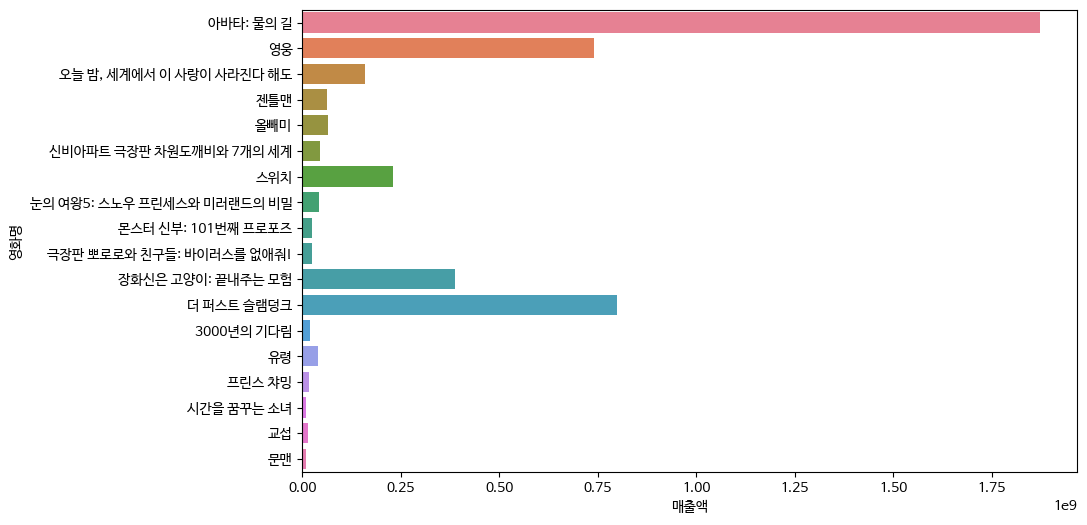

In [39]:
plt.figure(figsize=(10,6))
plt.rc("font",family="NanumBarunGothic")
sns.barplot(y= '영화명', x= '매출액', data = df, hue = '영화명', ci = None)
plt.show()

기타 영화정보 조회

In [38]:
url2 = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchWeeklyBoxOfficeList.json'
pram2 = {'key':apikey, 'targetDt':tdt}
resp = requests.get(url2, params=pram2)
resp
data = resp.json()
print(data)

{'boxOfficeResult': {'boxofficeType': '주말 박스오피스', 'showRange': '20221230~20230101', 'yearWeekTime': '202252', 'weeklyBoxOfficeList': [{'rnum': '1', 'rank': '1', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20225061', 'movieNm': '아바타: 물의 길', 'openDt': '2022-12-14', 'salesAmt': '16391114809', 'salesShare': '63.4', 'salesInten': '-7660224111', 'salesChange': '-31.8', 'salesAcc': '95843585053', 'audiCnt': '1274376', 'audiInten': '-631180', 'audiChange': '-33.1', 'audiAcc': '7742682', 'scrnCnt': '2075', 'showCnt': '21889'}, {'rnum': '2', 'rank': '2', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20196478', 'movieNm': '영웅', 'openDt': '2022-12-21', 'salesAmt': '5265846807', 'salesShare': '20.4', 'salesInten': '-919203646', 'salesChange': '-14.9', 'salesAcc': '16442796442', 'audiCnt': '519000', 'audiInten': '-85249', 'audiChange': '-14.1', 'audiAcc': '1672933', 'scrnCnt': '1099', 'showCnt': '10700'}, {'rnum': '3', 'rank': '3', 'rankInten': '0', 'rankOldAndNew': 'NEW', 'movieCd

In [ ]:
url3 = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json'

pram3 = {'key':apikey, 'movieCd':'20170561'}
resp = requests.get(url3, params=pram3)
resp
data = resp.json()
print(data)